In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
# Define the exact solution u = H
def exact_solution_h(x, y, t):
    return -torch.sin(x)*torch.sin(y)*torch.cos(t)

def initial_condition_h(x, y):
    return -torch.sin(x)*torch.sin(y) 

In [3]:
# Define the exact solution p = E
def exact_solution_e1(x, y, t):
    return -torch.sin(x)*torch.sin(t)*torch.cos(y)

def initial_condition_e1(x, y):
    return 0.0*torch.sin(x) 

In [4]:
# Define the exact solution p = E
def exact_solution_e2(x, y, t):
    return torch.sin(y)*torch.sin(t)*torch.cos(x)

def initial_condition_e2(x, y):
    return 0.0*torch.sin(x) 

In [5]:
n_data = 100
n_var = 3
data_inp1 = torch.zeros((n_data, n_var))
data_inp1[:, 0] = pi/4
data_inp1[:, 1] = 2*pi*torch.rand((n_data,1)).reshape(-1,)
data_inp1[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp2 = torch.zeros((n_data, n_var))
data_inp2[:, 0] = pi/2
data_inp2[:, 1] = 2*pi*torch.rand((n_data,1)).reshape(-1,)
data_inp2[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp3 = torch.zeros((n_data, n_var))
data_inp3[:, 0] = 3*pi/4
data_inp3[:, 1] = 2*pi*torch.rand((n_data,1)).reshape(-1,)
data_inp3[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp4 = torch.zeros((n_data, n_var))
data_inp4[:, 0] = 2*pi*torch.rand((n_data,1)).reshape(-1,)
data_inp4[:, 1] = pi/4
data_inp4[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp5 = torch.zeros((n_data, n_var))
data_inp5[:, 0] = 2*pi*torch.rand((n_data,1)).reshape(-1,)
data_inp5[:, 1] = pi/2
data_inp5[:, 2] = torch.rand((n_data,1)).reshape(-1,)

data_inp6 = torch.zeros((n_data, n_var))
data_inp6[:, 0] = 2*pi*torch.rand((n_data,1)).reshape(-1,)
data_inp6[:, 1] = 3*pi/4
data_inp6[:, 2] = torch.rand((n_data,1)).reshape(-1,)

In [6]:
h_data1 = exact_solution_h(data_inp1[:, 0], data_inp1[:, 1], data_inp1[:, 2])
h_data1 = h_data1.reshape(-1,1)

h_data2 = exact_solution_h(data_inp2[:, 0], data_inp2[:, 1], data_inp2[:, 2])
h_data2 = h_data2.reshape(-1,1)

h_data3 = exact_solution_h(data_inp3[:, 0], data_inp3[:, 1], data_inp3[:, 2])
h_data3 = h_data3.reshape(-1,1)

h_data4 = exact_solution_h(data_inp4[:, 0], data_inp4[:, 1], data_inp4[:, 2])
h_data4 = h_data4.reshape(-1,1)

h_data5 = exact_solution_h(data_inp5[:, 0], data_inp5[:, 1], data_inp5[:, 2])
h_data5 = h_data5.reshape(-1,1)

h_data6 = exact_solution_h(data_inp6[:, 0], data_inp6[:, 1], data_inp6[:, 2])
h_data6 = h_data6.reshape(-1,1)

In [7]:
# assigning number of points
initial_pts = 200 
left_boundary_pts = 200
right_boundary_pts = 200
back_boundary_pts = 200
front_boundary_pts = 200
residual_pts = 1000

In [8]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"

x_init = pi*torch.rand((initial_pts,1)) # initial pts
y_init = pi*torch.rand((initial_pts,1))
t_init =  0*x_init
init =  torch.cat([x_init, y_init, t_init],1)
h_init = initial_condition_h(init[:,0], init[:, 1]).reshape(-1, 1)
e1_init = initial_condition_e1(init[:,0], init[:, 1]).reshape(-1, 1)
e2_init = initial_condition_e2(init[:,0], init[:, 1]).reshape(-1, 1)
w_init = torch.cat([h_init, e1_init, e2_init],1)


xb_left = torch.zeros((left_boundary_pts, 1)) # left spatial boundary
yb_left = pi*torch.rand((left_boundary_pts, 1)) # left spatial boundary
tb_left = torch.rand((left_boundary_pts, 1)) # 
b_left = torch.cat([xb_left, yb_left, tb_left ],1)
h_b_l = exact_solution_h(xb_left, yb_left, tb_left).reshape(-1, 1)
e1_b_l = exact_solution_e1(xb_left, yb_left, tb_left).reshape(-1, 1)
e2_b_l = exact_solution_e2(xb_left, yb_left, tb_left).reshape(-1, 1)



xb_right = pi*torch.ones((right_boundary_pts, 1)) # right spatial boundary
yb_right = pi*torch.rand((right_boundary_pts, 1)) # right spatial boundary
tb_right = torch.rand((right_boundary_pts, 1)) # right boundary pts
b_right = torch.cat([xb_right, yb_right, tb_right ],1)
h_b_r = exact_solution_h(xb_right, yb_right, tb_right).reshape(-1, 1)
e1_b_r = exact_solution_e1(xb_right, yb_right, tb_right).reshape(-1, 1)
e2_b_r = exact_solution_e2(xb_right, yb_right, tb_right).reshape(-1, 1)



xb_front = pi*torch.rand((front_boundary_pts, 1)) # front spatial boundary
yb_front = torch.zeros((front_boundary_pts, 1)) # front spatial boundary
tb_front = torch.rand((front_boundary_pts, 1)) # 
b_front = torch.cat([xb_front, yb_front, tb_front ],1)
h_b_f = exact_solution_h(xb_front, yb_front, tb_front).reshape(-1, 1)
e1_b_f = exact_solution_e1(xb_front, yb_front, tb_front).reshape(-1, 1)
e2_b_f = exact_solution_e2(xb_front, yb_front, tb_front).reshape(-1, 1)



xb_back = pi*torch.rand((back_boundary_pts, 1)) # back spatial boundary
yb_back = pi*torch.ones((back_boundary_pts, 1)) # back spatial boundary
tb_back = torch.rand((back_boundary_pts, 1)) # back boundary pts
b_back = torch.cat([xb_back, yb_back, tb_back ],1)
h_b_b = exact_solution_h(xb_back, yb_back, tb_back).reshape(-1, 1)
e1_b_b = exact_solution_e1(xb_back, yb_back, tb_back).reshape(-1, 1)
e2_b_b = exact_solution_e2(xb_back, yb_back, tb_back).reshape(-1, 1)



x_interior = pi*torch.rand((residual_pts, 1))
y_interior = pi*torch.rand((residual_pts, 1))
t_interior = torch.rand((residual_pts, 1))
interior = torch.cat([x_interior, y_interior, t_interior],1)





training_set = DataLoader(torch.utils.data.TensorDataset(init, w_init, b_left,  b_right, b_front, b_back), batch_size=200, shuffle=False)

In [9]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)


In [10]:
# Model definition
my_network = NeuralNet(input_dimension = init.shape[1], output_dimension = w_init.shape[1]+5, n_hidden_layers=4, neurons=20)


In [11]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
#print(my_network(init))

In [12]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [13]:
def fit(model, training_set, interior, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (initial, w_initial, bd_left,  bd_right, bd_front, bd_back) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # for initial
                initial.requires_grad = True
                w_initial_pred_ = model(initial)
                h_initial_pred_ = w_initial_pred_[:,0].reshape(-1,1)
                e1_initial_pred_ = w_initial_pred_[:,1].reshape(-1,1)
                e2_initial_pred_ = w_initial_pred_[:,2].reshape(-1,1)
                
                
                # with derivative
                inpu = torch.ones(initial_pts, 1 )
                
                grad_h_ini = torch.autograd.grad(h_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                h_initial_t = grad_h_ini[:, 2]
                
                grad_e1_ini = torch.autograd.grad(e1_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e1_initial_t = grad_e1_ini[:, 2]
                
                grad_e2_ini = torch.autograd.grad(e2_initial_pred_, initial, grad_outputs=inpu, create_graph=True, allow_unused=True)[0]
                e2_initial_t = grad_e2_ini[:, 2]
                
                
                
                # for left boundary
                w_bd_left_pred_ = model(bd_left)
                h_bd_left_pred_ = w_bd_left_pred_[:,0].reshape(-1,1)
                e1_bd_left_pred_ = w_bd_left_pred_[:,1].reshape(-1,1)
                e2_bd_left_pred_ = w_bd_left_pred_[:,2].reshape(-1,1)
                
                # for right boundary
                w_bd_right_pred_ = model(bd_right)
                h_bd_right_pred_ = w_bd_right_pred_[:,0].reshape(-1,1)
                e1_bd_right_pred_ = w_bd_right_pred_[:,1].reshape(-1,1)
                e2_bd_right_pred_ = w_bd_right_pred_[:,2].reshape(-1,1)
                
                # for front boundary
                w_bd_front_pred_ = model(bd_front)
                h_bd_front_pred_ = w_bd_front_pred_[:,0].reshape(-1,1)
                e1_bd_front_pred_ = w_bd_front_pred_[:,1].reshape(-1,1)
                e2_bd_front_pred_ = w_bd_front_pred_[:,2].reshape(-1,1)
                
                # for back boundary
                w_bd_back_pred_ = model(bd_back)
                h_bd_back_pred_ = w_bd_back_pred_[:,0].reshape(-1,1)
                e1_bd_back_pred_ = w_bd_back_pred_[:,1].reshape(-1,1)
                e2_bd_back_pred_ = w_bd_back_pred_[:,2].reshape(-1,1)
                
                # residual calculation
                interior.requires_grad = True
                w_hat = model(interior)
                h_hat = w_hat[:,0].reshape(-1,1)
                e1_hat = w_hat[:,1].reshape(-1,1)
                e2_hat = w_hat[:,2].reshape(-1,1)
                alpha1 = w_hat[:, 3].reshape(-1,1)
                alpha2 = w_hat[:, 4].reshape(-1,1)
                alpha3 = w_hat[:, 5].reshape(-1,1)
                alpha4 = w_hat[:, 6].reshape(-1,1)
                alpha5 = w_hat[:, 7].reshape(-1,1)
                
                inputs = torch.ones(residual_pts, 1 )
                inputs2 = torch.ones(residual_pts, 1)
                
                grad_h_hat = torch.autograd.grad(h_hat.reshape(-1,1), interior, grad_outputs=inputs, create_graph=True)[0]
                h_x = grad_h_hat[:, 0].reshape(-1,1)
                h_y = grad_h_hat[:, 1].reshape(-1,1)
                
                grad_e1_hat = torch.autograd.grad(e1_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e1_x = grad_e1_hat[:, 0].reshape(-1,1)
                e1_y = grad_e1_hat[:, 1].reshape(-1,1)
                
                grad_e2_hat = torch.autograd.grad(e2_hat, interior, grad_outputs=inputs, create_graph=True)[0]
                e2_x = grad_e2_hat[:, 0].reshape(-1,1)
                e2_y = grad_e2_hat[:, 1].reshape(-1,1)
                
                h_t = grad_h_hat[:, 2].reshape(-1,1)
                e1_t = grad_e1_hat[:, 2].reshape(-1,1)
                e2_t = grad_e2_hat[:, 2].reshape(-1,1)
                
                output_data_pred1_ = model(data_inp1)
                h_data_pred1_ = output_data_pred1_[:, 0]
                
                output_data_pred2_ = model(data_inp2)
                h_data_pred2_ = output_data_pred2_[:, 0]
                
                output_data_pred3_ = model(data_inp3)
                h_data_pred3_ = output_data_pred3_[:, 0]
                
                output_data_pred4_ = model(data_inp4)
                h_data_pred4_ = output_data_pred4_[:, 0]
                
                output_data_pred5_ = model(data_inp5)
                h_data_pred5_ = output_data_pred5_[:, 0]
                
                output_data_pred6_ = model(data_inp6)
                h_data_pred6_ = output_data_pred6_[:, 0]
                
                
                # Item 1. below
                loss1 = torch.mean((h_initial_pred_.reshape(-1, ) - w_initial[:,0].reshape(-1, ))**p) + 0.1*torch.mean((alpha5*h_t.reshape(-1, ) + e2_x.reshape(-1, ) - e1_y.reshape(-1, ))**p)+torch.mean((h_bd_left_pred_.reshape(-1,)- h_b_l.reshape(-1,))**p) + torch.mean((h_bd_right_pred_.reshape(-1,)- h_b_r.reshape(-1,))**p) +torch.mean((h_bd_front_pred_.reshape(-1,)- h_b_f.reshape(-1,))**p) + torch.mean((h_bd_back_pred_.reshape(-1,)- h_b_b.reshape(-1,))**p)
                loss2 = torch.mean((e1_initial_pred_.reshape(-1, ) - w_initial[:,1].reshape(-1, ))**p)+ 0.1*torch.mean((alpha1*e1_t.reshape(-1, ) + alpha2*e2_t.reshape(-1, ) - h_y.reshape(-1, ) + 3*torch.sin(interior[:, 0])*torch.cos(interior[:, 2])*torch.cos(interior[:, 1]) - 2*torch.cos(interior[:, 0])*torch.cos(interior[:, 2])*torch.sin(interior[:, 1]) )**p) +torch.mean((e1_bd_left_pred_.reshape(-1,)- e1_b_l.reshape(-1,))**p) + torch.mean((e1_bd_right_pred_.reshape(-1,)- e1_b_r.reshape(-1,))**p) +torch.mean((e1_bd_front_pred_.reshape(-1,)- e1_b_f.reshape(-1,))**p) + torch.mean((e1_bd_back_pred_.reshape(-1,)- e1_b_b.reshape(-1,))**p)
                loss3 = torch.mean((e2_initial_pred_.reshape(-1, ) - w_initial[:,2].reshape(-1, ))**p)+ 0.1*torch.mean((alpha3*e1_t.reshape(-1, ) + alpha4*e2_t.reshape(-1, )  + h_x.reshape(-1, ) + 2*torch.sin(interior[:, 0])*torch.cos(interior[:, 2])*torch.cos(interior[:, 1]))**p) +torch.mean((e2_bd_left_pred_.reshape(-1,)- e2_b_l.reshape(-1,))**p) + torch.mean((e2_bd_right_pred_.reshape(-1,)- e2_b_r.reshape(-1,))**p) +torch.mean((e2_bd_front_pred_.reshape(-1,)- e2_b_f.reshape(-1,))**p) + torch.mean((e2_bd_back_pred_.reshape(-1,)- e2_b_b.reshape(-1,))**p)
                data = torch.mean((h_data_pred1_.reshape(-1, ) - h_data1.reshape(-1, ))**p) + torch.mean((h_data_pred2_.reshape(-1, ) - h_data2.reshape(-1, ))**p) + torch.mean((h_data_pred3_.reshape(-1, ) - h_data3.reshape(-1, ))**p) + torch.mean((h_data_pred4_.reshape(-1, ) - h_data4.reshape(-1, ))**p) + torch.mean((h_data_pred5_.reshape(-1, ) - h_data5.reshape(-1, ))**p) + torch.mean((h_data_pred6_.reshape(-1, ) - h_data6.reshape(-1, ))**p)
                loss = loss1 + loss2 + loss3 + 0.1*data
                
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [14]:
n_epochs = 5000
history = fit(my_network, training_set, interior, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  22.583534240722656
################################  1  ################################
Loss:  22.225629806518555
################################  2  ################################
Loss:  14.599251747131348
################################  3  ################################
Loss:  7.371339321136475
################################  4  ################################
Loss:  6.337103366851807
################################  5  ################################
Loss:  5.781862735748291
################################  6  ################################
Loss:  5.281896591186523
################################  7  ################################
Loss:  4.824296951293945
################################  8  ################################
Loss:  4.407198429107666
################################  9  ################################
Loss:  4.026889324188232
################################  10  #########

Loss:  0.18916639685630798
################################  86  ################################
Loss:  0.18389609456062317
################################  87  ################################
Loss:  0.1787499189376831
################################  88  ################################
Loss:  0.17384815216064453
################################  89  ################################
Loss:  0.16916289925575256
################################  90  ################################
Loss:  0.1647244691848755
################################  91  ################################
Loss:  0.1605837345123291
################################  92  ################################
Loss:  0.1567663550376892
################################  93  ################################
Loss:  0.1532648354768753
################################  94  ################################
Loss:  0.15013976395130157
################################  95  ################################
Loss:  0.1472200751304626

Loss:  0.058490458875894547
################################  172  ################################
Loss:  0.0580645352602005
################################  173  ################################
Loss:  0.05765964090824127
################################  174  ################################
Loss:  0.05721289664506912
################################  175  ################################
Loss:  0.05675710737705231
################################  176  ################################
Loss:  0.056299276649951935
################################  177  ################################
Loss:  0.05583557114005089
################################  178  ################################
Loss:  0.055381931364536285
################################  179  ################################
Loss:  0.05491429194808006
################################  180  ################################
Loss:  0.054431699216365814
################################  181  ################################
Loss:  

Loss:  0.03281502425670624
################################  258  ################################
Loss:  0.0326676145195961
################################  259  ################################
Loss:  0.032519906759262085
################################  260  ################################
Loss:  0.03236546367406845
################################  261  ################################
Loss:  0.0322042852640152
################################  262  ################################
Loss:  0.03206705302000046
################################  263  ################################
Loss:  0.03192773461341858
################################  264  ################################
Loss:  0.03178144618868828
################################  265  ################################
Loss:  0.031641338020563126
################################  266  ################################
Loss:  0.03149896860122681
################################  267  ################################
Loss:  0.0

Loss:  0.022212941199541092
################################  341  ################################
Loss:  0.022089753299951553
################################  342  ################################
Loss:  0.02197377383708954
################################  343  ################################
Loss:  0.021854406222701073
################################  344  ################################
Loss:  0.021738432347774506
################################  345  ################################
Loss:  0.02162041887640953
################################  346  ################################
Loss:  0.02150903083384037
################################  347  ################################
Loss:  0.02138722687959671
################################  348  ################################
Loss:  0.021268978714942932
################################  349  ################################
Loss:  0.021150603890419006
################################  350  ################################
Loss

Loss:  0.01453486829996109
################################  425  ################################
Loss:  0.01445271261036396
################################  426  ################################
Loss:  0.014373254030942917
################################  427  ################################
Loss:  0.014292508363723755
################################  428  ################################
Loss:  0.014213682152330875
################################  429  ################################
Loss:  0.014135191217064857
################################  430  ################################
Loss:  0.014060933142900467
################################  431  ################################
Loss:  0.013987619429826736
################################  432  ################################
Loss:  0.013917116448283195
################################  433  ################################
Loss:  0.013846779242157936
################################  434  ################################
Lo

Loss:  0.009720470756292343
################################  510  ################################
Loss:  0.009677667170763016
################################  511  ################################
Loss:  0.009637011215090752
################################  512  ################################
Loss:  0.009597732685506344
################################  513  ################################
Loss:  0.00956031121313572
################################  514  ################################
Loss:  0.009522523730993271
################################  515  ################################
Loss:  0.009483939968049526
################################  516  ################################
Loss:  0.009447891265153885
################################  517  ################################
Loss:  0.009413695894181728
################################  518  ################################
Loss:  0.009382608346641064
################################  519  ################################
L

Loss:  0.006861026398837566
################################  593  ################################
Loss:  0.006835388019680977
################################  594  ################################
Loss:  0.006808066740632057
################################  595  ################################
Loss:  0.00678215641528368
################################  596  ################################
Loss:  0.006756598595529795
################################  597  ################################
Loss:  0.006730442401021719
################################  598  ################################
Loss:  0.006704957224428654
################################  599  ################################
Loss:  0.006677649449557066
################################  600  ################################
Loss:  0.006649894639849663
################################  601  ################################
Loss:  0.006620714906603098
################################  602  ################################
L

Loss:  0.004720376338809729
################################  676  ################################
Loss:  0.004696226678788662
################################  677  ################################
Loss:  0.004672480281442404
################################  678  ################################
Loss:  0.004650202579796314
################################  679  ################################
Loss:  0.004627775866538286
################################  680  ################################
Loss:  0.004606090486049652
################################  681  ################################
Loss:  0.0045831394381821156
################################  682  ################################
Loss:  0.004564885515719652
################################  683  ################################
Loss:  0.0045462483540177345
################################  684  ################################
Loss:  0.004525193013250828
################################  685  ###############################

Loss:  0.0034706993028521538
################################  760  ################################
Loss:  0.0034653295297175646
################################  761  ################################
Loss:  0.0034603935200721025
################################  762  ################################
Loss:  0.0034555532038211823
################################  763  ################################
Loss:  0.0034507950767874718
################################  764  ################################
Loss:  0.003445702139288187
################################  765  ################################
Loss:  0.0034409337677061558
################################  766  ################################
Loss:  0.003436335828155279
################################  767  ################################
Loss:  0.003431506920605898
################################  768  ################################
Loss:  0.003426546463742852
################################  769  ###########################

Loss:  0.002822590759024024
################################  844  ################################
Loss:  0.002813831204548478
################################  845  ################################
Loss:  0.0028056795708835125
################################  846  ################################
Loss:  0.002798051107674837
################################  847  ################################
Loss:  0.0027887746691703796
################################  848  ################################
Loss:  0.002780303591862321
################################  849  ################################
Loss:  0.0027706152759492397
################################  850  ################################
Loss:  0.002759887371212244
################################  851  ################################
Loss:  0.0027487673796713352
################################  852  ################################
Loss:  0.0027368110604584217
################################  853  ############################

Loss:  0.002237451495602727
################################  929  ################################
Loss:  0.002228259574621916
################################  930  ################################
Loss:  0.002219594083726406
################################  931  ################################
Loss:  0.002210727659985423
################################  932  ################################
Loss:  0.0022019734606146812
################################  933  ################################
Loss:  0.0021935333497822285
################################  934  ################################
Loss:  0.0021852166391909122
################################  935  ################################
Loss:  0.0021773448679596186
################################  936  ################################
Loss:  0.002169864485040307
################################  937  ################################
Loss:  0.002162751741707325
################################  938  #############################

Loss:  0.0018443911103531718
################################  1012  ################################
Loss:  0.0018408310133963823
################################  1013  ################################
Loss:  0.0018369659082964063
################################  1014  ################################
Loss:  0.001833323622122407
################################  1015  ################################
Loss:  0.0018296341877430677
################################  1016  ################################
Loss:  0.001826120656915009
################################  1017  ################################
Loss:  0.0018226695246994495
################################  1018  ################################
Loss:  0.001819248660467565
################################  1019  ################################
Loss:  0.0018159114988520741
################################  1020  ################################
Loss:  0.0018126299837604165
################################  1021  ################

Loss:  0.0016280337003991008
################################  1096  ################################
Loss:  0.0016258645337074995
################################  1097  ################################
Loss:  0.0016238061944022775
################################  1098  ################################
Loss:  0.0016219557728618383
################################  1099  ################################
Loss:  0.0016200998798012733
################################  1100  ################################
Loss:  0.0016184885753318667
################################  1101  ################################
Loss:  0.0016168567817658186
################################  1102  ################################
Loss:  0.0016153447795659304
################################  1103  ################################
Loss:  0.0016136880731210113
################################  1104  ################################
Loss:  0.0016117290360853076
################################  1105  #############

Loss:  0.0014648595824837685
################################  1179  ################################
Loss:  0.001462258631363511
################################  1180  ################################
Loss:  0.0014596839901059866
################################  1181  ################################
Loss:  0.001457109348848462
################################  1182  ################################
Loss:  0.001454659504815936
################################  1183  ################################
Loss:  0.0014522239798679948
################################  1184  ################################
Loss:  0.0014498044038191438
################################  1185  ################################
Loss:  0.0014472920447587967
################################  1186  ################################
Loss:  0.001444746390916407
################################  1187  ################################
Loss:  0.0014422230888158083
################################  1188  #################

Loss:  0.0012553667183965445
################################  1261  ################################
Loss:  0.0012527452781796455
################################  1262  ################################
Loss:  0.0012501922901719809
################################  1263  ################################
Loss:  0.0012475404655560851
################################  1264  ################################
Loss:  0.0012450988870114088
################################  1265  ################################
Loss:  0.001242663012817502
################################  1266  ################################
Loss:  0.001240566954948008
################################  1267  ################################
Loss:  0.001238582655787468
################################  1268  ################################
Loss:  0.0012366734445095062
################################  1269  ################################
Loss:  0.00123494490981102
################################  1270  ##################

Loss:  0.0011147840414196253
################################  1344  ################################
Loss:  0.001112709753215313
################################  1345  ################################
Loss:  0.001110846409574151
################################  1346  ################################
Loss:  0.0011090125190094113
################################  1347  ################################
Loss:  0.0011070958571508527
################################  1348  ################################
Loss:  0.0011054102797061205
################################  1349  ################################
Loss:  0.0011038153897970915
################################  1350  ################################
Loss:  0.0011023032711818814
################################  1351  ################################
Loss:  0.0011008530855178833
################################  1352  ################################
Loss:  0.0010994389886036515
################################  1353  ###############

Loss:  0.001012976747006178
################################  1427  ################################
Loss:  0.0010120691731572151
################################  1428  ################################
Loss:  0.0010112290037795901
################################  1429  ################################
Loss:  0.001010370091535151
################################  1430  ################################
Loss:  0.0010093898745253682
################################  1431  ################################
Loss:  0.0010083733359351754
################################  1432  ################################
Loss:  0.0010073945159092546
################################  1433  ################################
Loss:  0.0010063813533633947
################################  1434  ################################
Loss:  0.0010053555015474558
################################  1435  ################################
Loss:  0.0010042816866189241
################################  1436  ###############

Loss:  0.0009319497039541602
################################  1510  ################################
Loss:  0.0009310031309723854
################################  1511  ################################
Loss:  0.0009300989913754165
################################  1512  ################################
Loss:  0.0009292272734455764
################################  1513  ################################
Loss:  0.0009284052648581564
################################  1514  ################################
Loss:  0.0009275774355046451
################################  1515  ################################
Loss:  0.000926765613257885
################################  1516  ################################
Loss:  0.0009259872604161501
################################  1517  ################################
Loss:  0.000925143831409514
################################  1518  ################################
Loss:  0.0009243751410394907
################################  1519  ###############

Loss:  0.0008577968110330403
################################  1594  ################################
Loss:  0.0008571603102609515
################################  1595  ################################
Loss:  0.0008564669406041503
################################  1596  ################################
Loss:  0.0008558521512895823
################################  1597  ################################
Loss:  0.0008552747895009816
################################  1598  ################################
Loss:  0.0008546937606297433
################################  1599  ################################
Loss:  0.0008541321149095893
################################  1600  ################################
Loss:  0.0008535621454939246
################################  1601  ################################
Loss:  0.000852988800033927
################################  1602  ################################
Loss:  0.0008524056174792349
################################  1603  ##############

Loss:  0.0007887474494054914
################################  1676  ################################
Loss:  0.0007878993055783212
################################  1677  ################################
Loss:  0.0007872453425079584
################################  1678  ################################
Loss:  0.0007864966755732894
################################  1679  ################################
Loss:  0.000785590847954154
################################  1680  ################################
Loss:  0.0007846124935895205
################################  1681  ################################
Loss:  0.0007836311124265194
################################  1682  ################################
Loss:  0.0007826066575944424
################################  1683  ################################
Loss:  0.0007816703873686492
################################  1684  ################################
Loss:  0.0007807306246832013
################################  1685  ##############

Loss:  0.000721782969776541
################################  1758  ################################
Loss:  0.0007207518210634589
################################  1759  ################################
Loss:  0.0007197065278887749
################################  1760  ################################
Loss:  0.0007186982547864318
################################  1761  ################################
Loss:  0.0007176971412263811
################################  1762  ################################
Loss:  0.0007167337462306023
################################  1763  ################################
Loss:  0.0007157267536967993
################################  1764  ################################
Loss:  0.0007147424621507525
################################  1765  ################################
Loss:  0.0007137485663406551
################################  1766  ################################
Loss:  0.000712847919203341
################################  1767  ###############

Loss:  0.0006590546108782291
################################  1840  ################################
Loss:  0.0006585827795788646
################################  1841  ################################
Loss:  0.0006581200868822634
################################  1842  ################################
Loss:  0.0006576760206371546
################################  1843  ################################
Loss:  0.0006572374259121716
################################  1844  ################################
Loss:  0.0006567903910763562
################################  1845  ################################
Loss:  0.0006563748465850949
################################  1846  ################################
Loss:  0.0006559614557772875
################################  1847  ################################
Loss:  0.0006555247819051147
################################  1848  ################################
Loss:  0.0006550710531882942
################################  1849  #############

Loss:  0.0006138646858744323
################################  1924  ################################
Loss:  0.0006135677685961127
################################  1925  ################################
Loss:  0.0006132855196483433
################################  1926  ################################
Loss:  0.0006129856337793171
################################  1927  ################################
Loss:  0.0006126643274910748
################################  1928  ################################
Loss:  0.000612327887210995
################################  1929  ################################
Loss:  0.0006120362086221576
################################  1930  ################################
Loss:  0.0006117558805271983
################################  1931  ################################
Loss:  0.0006113977287895977
################################  1932  ################################
Loss:  0.0006111218826845288
################################  1933  ##############

Loss:  0.0005654009291902184
################################  2006  ################################
Loss:  0.0005650466773658991
################################  2007  ################################
Loss:  0.0005646448116749525
################################  2008  ################################
Loss:  0.0005641162861138582
################################  2009  ################################
Loss:  0.0005636162823066115
################################  2010  ################################
Loss:  0.0005631844396702945
################################  2011  ################################
Loss:  0.0005627267528325319
################################  2012  ################################
Loss:  0.0005622272146865726
################################  2013  ################################
Loss:  0.0005616627749986947
################################  2014  ################################
Loss:  0.0005610977532342076
################################  2015  #############

Loss:  0.0005351510480977595
################################  2088  ################################
Loss:  0.0005346678663045168
################################  2089  ################################
Loss:  0.0005341828800737858
################################  2090  ################################
Loss:  0.0005337026086635888
################################  2091  ################################
Loss:  0.0005332246655598283
################################  2092  ################################
Loss:  0.0005327397957444191
################################  2093  ################################
Loss:  0.000532243400812149
################################  2094  ################################
Loss:  0.0005317679606378078
################################  2095  ################################
Loss:  0.000531278143171221
################################  2096  ################################
Loss:  0.0005308125982992351
################################  2097  ###############

Loss:  0.0005031826440244913
################################  2170  ################################
Loss:  0.0005027023144066334
################################  2171  ################################
Loss:  0.0005022432887926698
################################  2172  ################################
Loss:  0.0005018525407649577
################################  2173  ################################
Loss:  0.0005014989292249084
################################  2174  ################################
Loss:  0.0005011468310840428
################################  2175  ################################
Loss:  0.0005008175503462553
################################  2176  ################################
Loss:  0.0005005483981221914
################################  2177  ################################
Loss:  0.0005003059050068259
################################  2178  ################################
Loss:  0.0005000810488127172
################################  2179  #############

Loss:  0.0004819749156013131
################################  2252  ################################
Loss:  0.00048173009417951107
################################  2253  ################################
Loss:  0.0004815025895368308
################################  2254  ################################
Loss:  0.0004812729312106967
################################  2255  ################################
Loss:  0.0004810761602129787
################################  2256  ################################
Loss:  0.00048084708396345377
################################  2257  ################################
Loss:  0.0004806363140232861
################################  2258  ################################
Loss:  0.0004803362244274467
################################  2259  ################################
Loss:  0.00048010400496423244
################################  2260  ################################
Loss:  0.0004798249283339828
################################  2261  ##########

Loss:  0.0004549167933873832
################################  2335  ################################
Loss:  0.00045464604045264423
################################  2336  ################################
Loss:  0.00045440401299856603
################################  2337  ################################
Loss:  0.000454090244602412
################################  2338  ################################
Loss:  0.0004538764478638768
################################  2339  ################################
Loss:  0.0004536372434813529
################################  2340  ################################
Loss:  0.0004533618630375713
################################  2341  ################################
Loss:  0.00045302280341275036
################################  2342  ################################
Loss:  0.0004527393321041018
################################  2343  ################################
Loss:  0.000452466425485909
################################  2344  ############

Loss:  0.00042775413021445274
################################  2418  ################################
Loss:  0.00042744484380818903
################################  2419  ################################
Loss:  0.0004271436482667923
################################  2420  ################################
Loss:  0.0004268496413715184
################################  2421  ################################
Loss:  0.00042656867299228907
################################  2422  ################################
Loss:  0.00042627754737623036
################################  2423  ################################
Loss:  0.0004260308633092791
################################  2424  ################################
Loss:  0.0004257487307768315
################################  2425  ################################
Loss:  0.00042550056241452694
################################  2426  ################################
Loss:  0.0004252447688486427
################################  2427  ########

Loss:  0.0004000409971922636
################################  2501  ################################
Loss:  0.0003998223110102117
################################  2502  ################################
Loss:  0.00039955461397767067
################################  2503  ################################
Loss:  0.00039925152668729424
################################  2504  ################################
Loss:  0.00039892998756840825
################################  2505  ################################
Loss:  0.00039858900709077716
################################  2506  ################################
Loss:  0.0003981919144280255
################################  2507  ################################
Loss:  0.00039787255809642375
################################  2508  ################################
Loss:  0.0003975807339884341
################################  2509  ################################
Loss:  0.00039726143586449325
################################  2510  #######

Loss:  0.00038021328509785235
################################  2584  ################################
Loss:  0.0003799567639362067
################################  2585  ################################
Loss:  0.0003796668315771967
################################  2586  ################################
Loss:  0.00037937742308713496
################################  2587  ################################
Loss:  0.0003790881601162255
################################  2588  ################################
Loss:  0.00037877800059504807
################################  2589  ################################
Loss:  0.00037847735802643
################################  2590  ################################
Loss:  0.0003781747946050018
################################  2591  ################################
Loss:  0.000377881049644202
################################  2592  ################################
Loss:  0.00037758276448585093
################################  2593  ############

Loss:  0.00035978257074020803
################################  2666  ################################
Loss:  0.00035940599627792835
################################  2667  ################################
Loss:  0.0003590091655496508
################################  2668  ################################
Loss:  0.0003585980739444494
################################  2669  ################################
Loss:  0.0003581971977837384
################################  2670  ################################
Loss:  0.00035777539596892893
################################  2671  ################################
Loss:  0.0003573994617909193
################################  2672  ################################
Loss:  0.0003570300177671015
################################  2673  ################################
Loss:  0.00035658531123772264
################################  2674  ################################
Loss:  0.0003562623751349747
################################  2675  #########

Loss:  0.00033773615723475814
################################  2746  ################################
Loss:  0.00033749357680790126
################################  2747  ################################
Loss:  0.000337275821948424
################################  2748  ################################
Loss:  0.00033706420799717307
################################  2749  ################################
Loss:  0.0003368532343301922
################################  2750  ################################
Loss:  0.0003366486052982509
################################  2751  ################################
Loss:  0.00033643102506175637
################################  2752  ################################
Loss:  0.00033623361377976835
################################  2753  ################################
Loss:  0.0003360353293828666
################################  2754  ################################
Loss:  0.0003358449030201882
################################  2755  #########

Loss:  0.0003229545254725963
################################  2827  ################################
Loss:  0.00032265446498058736
################################  2828  ################################
Loss:  0.00032238458516076207
################################  2829  ################################
Loss:  0.00032210678909905255
################################  2830  ################################
Loss:  0.00032179540721699595
################################  2831  ################################
Loss:  0.00032148227910511196
################################  2832  ################################
Loss:  0.0003211710718460381
################################  2833  ################################
Loss:  0.0003209449932910502
################################  2834  ################################
Loss:  0.0003207115223631263
################################  2835  ################################
Loss:  0.00032045142143033445
################################  2836  #######

Loss:  0.00030629552202299237
################################  2909  ################################
Loss:  0.00030617238371632993
################################  2910  ################################
Loss:  0.00030606065411120653
################################  2911  ################################
Loss:  0.00030593358678743243
################################  2912  ################################
Loss:  0.00030581169994547963
################################  2913  ################################
Loss:  0.0003056964778807014
################################  2914  ################################
Loss:  0.0003055553534068167
################################  2915  ################################
Loss:  0.00030545220943167806
################################  2916  ################################
Loss:  0.00030530369258485734
################################  2917  ################################
Loss:  0.0003051730745937675
################################  2918  ######

Loss:  0.00029237213311716914
################################  2991  ################################
Loss:  0.00029226887272670865
################################  2992  ################################
Loss:  0.0002921609266195446
################################  2993  ################################
Loss:  0.00029203950543887913
################################  2994  ################################
Loss:  0.00029191281646490097
################################  2995  ################################
Loss:  0.00029178577824495733
################################  2996  ################################
Loss:  0.00029165271553210914
################################  2997  ################################
Loss:  0.0002914975048042834
################################  2998  ################################
Loss:  0.00029131947667337954
################################  2999  ################################
Loss:  0.00029113717027939856
################################  3000  #####

Loss:  0.0002782857045531273
################################  3074  ################################
Loss:  0.00027810948085971177
################################  3075  ################################
Loss:  0.00027792161563411355
################################  3076  ################################
Loss:  0.0002777611662168056
################################  3077  ################################
Loss:  0.0002775838947854936
################################  3078  ################################
Loss:  0.00027740196674130857
################################  3079  ################################
Loss:  0.00027722035883925855
################################  3080  ################################
Loss:  0.00027703787782229483
################################  3081  ################################
Loss:  0.0002768576378002763
################################  3082  ################################
Loss:  0.00027669663541018963
################################  3083  #######

Loss:  0.0002655228308867663
################################  3157  ################################
Loss:  0.0002653655828908086
################################  3158  ################################
Loss:  0.0002652167750056833
################################  3159  ################################
Loss:  0.00026507105212658644
################################  3160  ################################
Loss:  0.00026493347832001746
################################  3161  ################################
Loss:  0.00026479799998924136
################################  3162  ################################
Loss:  0.0002646454668138176
################################  3163  ################################
Loss:  0.00026449249708093703
################################  3164  ################################
Loss:  0.00026434106985107064
################################  3165  ################################
Loss:  0.0002641865867190063
################################  3166  ########

Loss:  0.00025228847516700625
################################  3240  ################################
Loss:  0.0002521240967325866
################################  3241  ################################
Loss:  0.00025195517810061574
################################  3242  ################################
Loss:  0.0002517741813790053
################################  3243  ################################
Loss:  0.000251593766734004
################################  3244  ################################
Loss:  0.00025145249674096704
################################  3245  ################################
Loss:  0.0002513036597520113
################################  3246  ################################
Loss:  0.0002511425409466028
################################  3247  ################################
Loss:  0.00025096922763623297
################################  3248  ################################
Loss:  0.0002508078468963504
################################  3249  ##########

Loss:  0.00023947915178723633
################################  3322  ################################
Loss:  0.0002394118346273899
################################  3323  ################################
Loss:  0.00023934250930324197
################################  3324  ################################
Loss:  0.00023927704023662955
################################  3325  ################################
Loss:  0.0002392148890066892
################################  3326  ################################
Loss:  0.00023912842152640224
################################  3327  ################################
Loss:  0.0002390620793448761
################################  3328  ################################
Loss:  0.00023897309438325465
################################  3329  ################################
Loss:  0.00023886476992629468
################################  3330  ################################
Loss:  0.0002387401764281094
################################  3331  #######

Loss:  0.0002294730074936524
################################  3402  ################################
Loss:  0.00022941039060242474
################################  3403  ################################
Loss:  0.00022934586741030216
################################  3404  ################################
Loss:  0.00022927936515770853
################################  3405  ################################
Loss:  0.0002292161516379565
################################  3406  ################################
Loss:  0.00022914906730875373
################################  3407  ################################
Loss:  0.00022908196842763573
################################  3408  ################################
Loss:  0.0002290161355631426
################################  3409  ################################
Loss:  0.00022894992434885353
################################  3410  ################################
Loss:  0.0002288832765771076
################################  3411  #######

Loss:  0.000222134476643987
################################  3483  ################################
Loss:  0.0002220784517703578
################################  3484  ################################
Loss:  0.00022202775289770216
################################  3485  ################################
Loss:  0.00022197910584509373
################################  3486  ################################
Loss:  0.00022192636970430613
################################  3487  ################################
Loss:  0.0002218761801486835
################################  3488  ################################
Loss:  0.00022182895918376744
################################  3489  ################################
Loss:  0.00022178073413670063
################################  3490  ################################
Loss:  0.00022173339675646275
################################  3491  ################################
Loss:  0.0002216852008132264
################################  3492  ########

Loss:  0.00021738620125688612
################################  3563  ################################
Loss:  0.00021732044115196913
################################  3564  ################################
Loss:  0.0002172468084609136
################################  3565  ################################
Loss:  0.00021715230832342058
################################  3566  ################################
Loss:  0.00021707093401346356
################################  3567  ################################
Loss:  0.00021698899217881262
################################  3568  ################################
Loss:  0.000216895918129012
################################  3569  ################################
Loss:  0.00021681458747480065
################################  3570  ################################
Loss:  0.0002167181228287518
################################  3571  ################################
Loss:  0.00021663951338268816
################################  3572  #######

Loss:  0.0002102094003930688
################################  3643  ################################
Loss:  0.00021013588411733508
################################  3644  ################################
Loss:  0.0002100717683788389
################################  3645  ################################
Loss:  0.00021000894776079804
################################  3646  ################################
Loss:  0.000209946243558079
################################  3647  ################################
Loss:  0.0002098871918860823
################################  3648  ################################
Loss:  0.00020982514251954854
################################  3649  ################################
Loss:  0.00020976681844331324
################################  3650  ################################
Loss:  0.00020971428602933884
################################  3651  ################################
Loss:  0.00020965977455489337
################################  3652  ########

Loss:  0.00020496605429798365
################################  3723  ################################
Loss:  0.00020487178699113429
################################  3724  ################################
Loss:  0.00020477020007092506
################################  3725  ################################
Loss:  0.0002046754234470427
################################  3726  ################################
Loss:  0.00020458243670873344
################################  3727  ################################
Loss:  0.00020450056763365865
################################  3728  ################################
Loss:  0.0002044110733550042
################################  3729  ################################
Loss:  0.00020431391021702439
################################  3730  ################################
Loss:  0.00020421802764758468
################################  3731  ################################
Loss:  0.00020411644072737545
################################  3732  #####

Loss:  0.00019672604685183614
################################  3806  ################################
Loss:  0.0001966083946172148
################################  3807  ################################
Loss:  0.0001964956900337711
################################  3808  ################################
Loss:  0.00019638609956018627
################################  3809  ################################
Loss:  0.0001962733658729121
################################  3810  ################################
Loss:  0.0001961610105354339
################################  3811  ################################
Loss:  0.00019603442342486233
################################  3812  ################################
Loss:  0.00019593072647694498
################################  3813  ################################
Loss:  0.00019580719526857138
################################  3814  ################################
Loss:  0.0001957015338120982
################################  3815  ########

Loss:  0.00018751571769826114
################################  3886  ################################
Loss:  0.00018745473062153906
################################  3887  ################################
Loss:  0.00018739156075753272
################################  3888  ################################
Loss:  0.00018732971511781216
################################  3889  ################################
Loss:  0.00018726169946603477
################################  3890  ################################
Loss:  0.00018719729268923402
################################  3891  ################################
Loss:  0.00018713597091846168
################################  3892  ################################
Loss:  0.00018707587150856853
################################  3893  ################################
Loss:  0.00018702012312132865
################################  3894  ################################
Loss:  0.00018696316692512482
################################  3895  ###

Loss:  0.00018325677956454456
################################  3966  ################################
Loss:  0.0001832053530961275
################################  3967  ################################
Loss:  0.00018315378110855818
################################  3968  ################################
Loss:  0.00018310356244910508
################################  3969  ################################
Loss:  0.00018305834964849055
################################  3970  ################################
Loss:  0.0001830085093388334
################################  3971  ################################
Loss:  0.00018296719645150006
################################  3972  ################################
Loss:  0.00018291964079253376
################################  3973  ################################
Loss:  0.0001828651875257492
################################  3974  ################################
Loss:  0.0001828070089686662
################################  3975  #######

Loss:  0.00017624681640882045
################################  4049  ################################
Loss:  0.00017616931290831417
################################  4050  ################################
Loss:  0.0001760765735525638
################################  4051  ################################
Loss:  0.0001759758742991835
################################  4052  ################################
Loss:  0.0001758941070875153
################################  4053  ################################
Loss:  0.00017579240375198424
################################  4054  ################################
Loss:  0.00017569700139574707
################################  4055  ################################
Loss:  0.00017559713160153478
################################  4056  ################################
Loss:  0.0001754719705786556
################################  4057  ################################
Loss:  0.00017535958613734692
################################  4058  #######

Loss:  0.0001702767622191459
################################  4130  ################################
Loss:  0.00017017907521221787
################################  4131  ################################
Loss:  0.00017010283772833645
################################  4132  ################################
Loss:  0.00017002645472530276
################################  4133  ################################
Loss:  0.00016994934412650764
################################  4134  ################################
Loss:  0.000169877806911245
################################  4135  ################################
Loss:  0.00016980378131847829
################################  4136  ################################
Loss:  0.0001697395055089146
################################  4137  ################################
Loss:  0.00016967562260106206
################################  4138  ################################
Loss:  0.0001696120307315141
################################  4139  ########

Loss:  0.0001652865466894582
################################  4213  ################################
Loss:  0.00016520885401405394
################################  4214  ################################
Loss:  0.00016513050650246441
################################  4215  ################################
Loss:  0.00016503996448591352
################################  4216  ################################
Loss:  0.00016496058378834277
################################  4217  ################################
Loss:  0.00016487573157064617
################################  4218  ################################
Loss:  0.00016477738972753286
################################  4219  ################################
Loss:  0.0001646779855946079
################################  4220  ################################
Loss:  0.00016457666060887277
################################  4221  ################################
Loss:  0.00016448578389827162
################################  4222  #####

Loss:  0.00016101327491924167
################################  4296  ################################
Loss:  0.00016097608022391796
################################  4297  ################################
Loss:  0.00016093446174636483
################################  4298  ################################
Loss:  0.00016089087876025587
################################  4299  ################################
Loss:  0.00016084309027064592
################################  4300  ################################
Loss:  0.00016079246415756643
################################  4301  ################################
Loss:  0.00016075052553787827
################################  4302  ################################
Loss:  0.00016070317360572517
################################  4303  ################################
Loss:  0.0001606492733117193
################################  4304  ################################
Loss:  0.00016059564950410277
################################  4305  ####

Loss:  0.00015729121514596045
################################  4378  ################################
Loss:  0.00015718580107204616
################################  4379  ################################
Loss:  0.00015709814033471048
################################  4380  ################################
Loss:  0.00015700128278695047
################################  4381  ################################
Loss:  0.00015690318832639605
################################  4382  ################################
Loss:  0.00015680560318287462
################################  4383  ################################
Loss:  0.00015671634173486382
################################  4384  ################################
Loss:  0.00015663212980143726
################################  4385  ################################
Loss:  0.00015653460286557674
################################  4386  ################################
Loss:  0.00015646529209334403
################################  4387  ###

Loss:  0.00015290427836589515
################################  4458  ################################
Loss:  0.00015287849237211049
################################  4459  ################################
Loss:  0.00015285388508345932
################################  4460  ################################
Loss:  0.00015282686217688024
################################  4461  ################################
Loss:  0.0001527990825707093
################################  4462  ################################
Loss:  0.0001527714921394363
################################  4463  ################################
Loss:  0.00015274751058313996
################################  4464  ################################
Loss:  0.00015272035670932382
################################  4465  ################################
Loss:  0.00015269624418579042
################################  4466  ################################
Loss:  0.00015266682021319866
################################  4467  #####

Loss:  0.00014911216567270458
################################  4541  ################################
Loss:  0.00014907466538716108
################################  4542  ################################
Loss:  0.0001490349241066724
################################  4543  ################################
Loss:  0.00014899492089170963
################################  4544  ################################
Loss:  0.00014895855565555394
################################  4545  ################################
Loss:  0.00014892210310790688
################################  4546  ################################
Loss:  0.0001488859998062253
################################  4547  ################################
Loss:  0.00014885247219353914
################################  4548  ################################
Loss:  0.00014881978859193623
################################  4549  ################################
Loss:  0.00014878470392432064
################################  4550  #####

Loss:  0.00014567615289706737
################################  4623  ################################
Loss:  0.00014563022705260664
################################  4624  ################################
Loss:  0.0001455865567550063
################################  4625  ################################
Loss:  0.00014554317749571055
################################  4626  ################################
Loss:  0.0001455039600841701
################################  4627  ################################
Loss:  0.0001454646117053926
################################  4628  ################################
Loss:  0.00014542468125000596
################################  4629  ################################
Loss:  0.000145386642543599
################################  4630  ################################
Loss:  0.0001453523145755753
################################  4631  ################################
Loss:  0.00014531824854202569
################################  4632  #########

Loss:  0.00014218692376744002
################################  4704  ################################
Loss:  0.0001421387423761189
################################  4705  ################################
Loss:  0.00014209189976099879
################################  4706  ################################
Loss:  0.0001420509652234614
################################  4707  ################################
Loss:  0.00014201282465364784
################################  4708  ################################
Loss:  0.00014196947449818254
################################  4709  ################################
Loss:  0.00014192727394402027
################################  4710  ################################
Loss:  0.00014188680506777018
################################  4711  ################################
Loss:  0.0001418457686668262
################################  4712  ################################
Loss:  0.00014180983998812735
################################  4713  ######

Loss:  0.00013869644317310303
################################  4785  ################################
Loss:  0.0001386391813866794
################################  4786  ################################
Loss:  0.00013858058082405478
################################  4787  ################################
Loss:  0.00013852215488441288
################################  4788  ################################
Loss:  0.00013846000365447253
################################  4789  ################################
Loss:  0.0001384059723932296
################################  4790  ################################
Loss:  0.0001383567287120968
################################  4791  ################################
Loss:  0.0001383114722557366
################################  4792  ################################
Loss:  0.000138268485898152
################################  4793  ################################
Loss:  0.00013822740584146231
################################  4794  #########

Loss:  0.00013530677824746817
################################  4866  ################################
Loss:  0.00013527889677789062
################################  4867  ################################
Loss:  0.00013524835230782628
################################  4868  ################################
Loss:  0.00013521201617550105
################################  4869  ################################
Loss:  0.00013518529885914177
################################  4870  ################################
Loss:  0.0001351570535916835
################################  4871  ################################
Loss:  0.00013512567966245115
################################  4872  ################################
Loss:  0.00013509178825188428
################################  4873  ################################
Loss:  0.00013506654067896307
################################  4874  ################################
Loss:  0.00013503796071745455
################################  4875  ####

Loss:  0.00013270217459648848
################################  4947  ################################
Loss:  0.0001326469937339425
################################  4948  ################################
Loss:  0.0001325888151768595
################################  4949  ################################
Loss:  0.0001325309567619115
################################  4950  ################################
Loss:  0.0001324785262113437
################################  4951  ################################
Loss:  0.00013242448039818555
################################  4952  ################################
Loss:  0.00013237408711574972
################################  4953  ################################
Loss:  0.00013232039054855704
################################  4954  ################################
Loss:  0.00013227126328274608
################################  4955  ################################
Loss:  0.0001322219759458676
################################  4956  ########

In [15]:
# saving and loading Model
FILE = "maxwell2D_3_inverse_run5.pth"
torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [16]:
# saving and loading Model (this model with reported results)
#FILE = "second.pth"
#torch.save(my_network, FILE)

# uncomment below when you need to test for different points
#my_network = torch.load(FILE)
#my_network.eval()

In [17]:
x_test = pi*torch.linspace(0, 1, 10000).reshape(-1,1)
y_test = pi*torch.linspace(0, 1, 10000).reshape(-1,1)
t_test = torch.ones((10000,1))
test = torch.cat([x_test, y_test, t_test],1)
h_test = exact_solution_h(x_test, y_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, t_test).reshape(-1,1)
w_test_pred = my_network(test)
h_test_pred = w_test_pred[:,0].reshape(-1,1)
e1_test_pred = w_test_pred[:,1].reshape(-1,1)
e2_test_pred = w_test_pred[:,2].reshape(-1,1)

In [18]:
print(torch.mean(w_test_pred[:,3]))

tensor(4.0116, grad_fn=<MeanBackward0>)


In [19]:
print(torch.mean(w_test_pred[:,4]))

tensor(1.9841, grad_fn=<MeanBackward0>)


In [20]:
print(torch.mean(w_test_pred[:,5]))

tensor(2.0116, grad_fn=<MeanBackward0>)


In [21]:
print(torch.mean(w_test_pred[:,6]))

tensor(0.9933, grad_fn=<MeanBackward0>)


In [22]:
print(torch.mean(w_test_pred[:,7]))

tensor(1.9868, grad_fn=<MeanBackward0>)


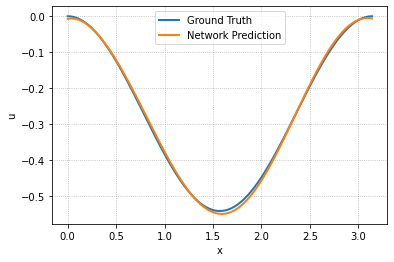

In [23]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, h_test, label="Ground Truth",lw=2)
plt.plot(x_test, h_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [24]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((h_test_pred - h_test)**2)/torch.mean(h_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.029090081807225943 %


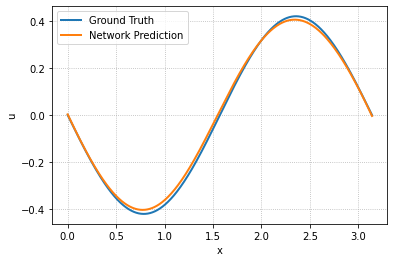

In [25]:
plt.grid(True, which="both", ls=":")
plt.plot(x_test, e1_test, label="Ground Truth",lw=2)
plt.plot(x_test, e1_test_pred.detach(), label="Network Prediction",lw=2)
plt.xlabel("x")
plt.ylabel("u")
plt.legend()

In [26]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e1_test_pred - e1_test)**2)/torch.mean(e1_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.21077049896121025 %


In [27]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((e2_test_pred - e2_test)**2)/torch.mean(e2_test**2)
#relative_error_test = torch.max(torch.abs(u_test_pred -u_test))/torch.max(torch.abs(u_test))
print("Relative Error Test: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test:  0.8980464190244675 %


In [28]:
# for ploting

In [29]:
model = my_network
x_test = pi*torch.rand(100000).reshape(-1,1)
y_test = pi*torch.rand(100000).reshape(-1,1)
t_test = torch.ones(100000).reshape(-1,1)

test = torch.cat([x_test, y_test, t_test],1)
h_test = exact_solution_h(x_test, y_test, t_test).reshape(-1,1)
e1_test = exact_solution_e1(x_test, y_test, t_test).reshape(-1,1)
e2_test = exact_solution_e2(x_test, y_test, t_test).reshape(-1,1)

b_test = 2*exact_solution_h(x_test, y_test, t_test).reshape(-1,1)
d1_test = 4*exact_solution_e1(x_test, y_test, t_test) + 2*exact_solution_e2(x_test, y_test, t_test)
d1_test = d1_test.reshape(-1,1)
d2_test = 2*exact_solution_e1(x_test, y_test, t_test) + 1*exact_solution_e2(x_test, y_test, t_test)
d2_test = d2_test.reshape(-1,1)

w_test_pred = my_network(test)
h_pred = w_test_pred[:, 0].reshape(-1,1) 
e1_pred = w_test_pred[:, 1].reshape(-1,1)
e2_pred = w_test_pred[:, 2].reshape(-1,1)
#func1_pred = w_test_pred[:, 3].reshape(-1,1)
#func2_pred = w_test_pred[:, 4].reshape(-1,1)

#func1_test = 2*torch.sin(x_test)*torch.cos(t_test)*torch.cos(y_test)
#func1_test = func1_test.reshape(-1,1)

#func2_test = -torch.cos(x_test)*torch.cos(t_test)*torch.sin(y_test)
#func2_test = func2_test.reshape(-1,1)

b_pred = 2*h_pred
d1_pred = 4*e1_pred + 2*e2_pred
d2_pred = 2*e1_pred + 1*e2_pred


relative_error_h = torch.abs(h_pred- h_test)
relative_error_e1 = torch.abs(e1_pred- e1_test)
relative_error_e2 = torch.abs(e2_pred- e2_test)
#relative_error_func1 = torch.abs(func1_pred- func1_test)
#relative_error_func2 = torch.abs(func2_pred- func2_test)
relative_error_b = torch.abs(b_pred- b_test)
relative_error_d1 = torch.abs(d1_pred- d1_test)
relative_error_d2 = torch.abs(d2_pred- d2_test)

x_test = x_test.detach().numpy()
y_test = y_test.detach().numpy()
t_test = t_test.detach().numpy()
h_pred = h_pred.detach().numpy()
e1_pred = e1_pred.detach().numpy()
e2_pred = e2_pred.detach().numpy()
b_pred = b_pred.detach().numpy()
d1_pred = d1_pred.detach().numpy()
d2_pred = d2_pred.detach().numpy()
#func1_pred = func1_pred.detach().numpy()
#func2_pred = func2_pred.detach().numpy()
relative_error_h = relative_error_h.detach().numpy()
relative_error_e1 = relative_error_e1.detach().numpy()
relative_error_e2 = relative_error_e2.detach().numpy()
#relative_error_func1 = relative_error_func1.detach().numpy()
#relative_error_func2 = relative_error_func2.detach().numpy()
#func1_test = func1_test.detach().numpy()
#func2_test = func2_test.detach().numpy()
relative_error_b = relative_error_b.detach().numpy()
relative_error_d1 = relative_error_d1.detach().numpy()
relative_error_d2 = relative_error_d2.detach().numpy()

x_test = x_test.reshape(-1,)
t_test = t_test.reshape(-1,)
h_pred = h_pred.reshape(-1,)
e1_pred = e1_pred.reshape(-1,)
e2_pred = e2_pred.reshape(-1,)
b_pred = b_pred.reshape(-1,)
d1_pred = d1_pred.reshape(-1,)
d2_pred = d2_pred.reshape(-1,)
#func1_pred = func1_pred.reshape(-1,)
#func2_pred = func2_pred.reshape(-1,)

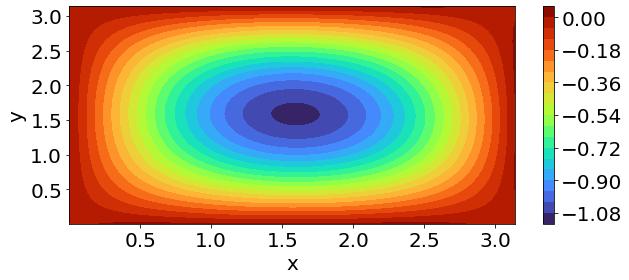

In [30]:
plt.rcParams['figure.figsize'] = [10, 4]

x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )

CS = plt.tricontourf(x_test, y_test, b_pred, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.savefig('Results/twod/exp3/b_pred_2d_3.png', dpi = 300, bbox_inches = "tight")

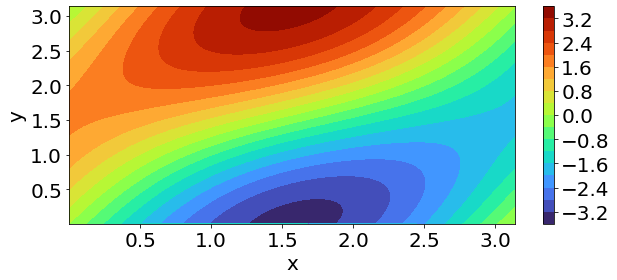

In [31]:
CS = plt.tricontourf(x_test, y_test, d1_pred, 20, cmap='turbo')

x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )

cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp3/d1_pred_2d_3.png', dpi = 300, bbox_inches = "tight")

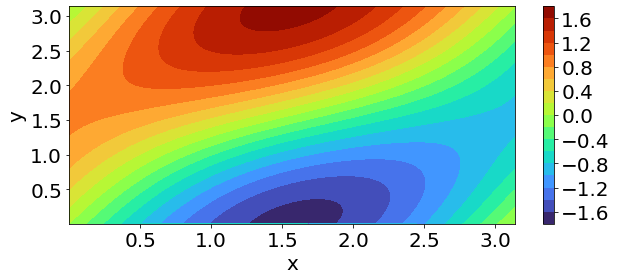

In [32]:
CS = plt.tricontourf(x_test, y_test, d2_pred, 20, cmap='turbo')

x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )

cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp3/d2_pred_2d_3.png', dpi = 300, bbox_inches = "tight")

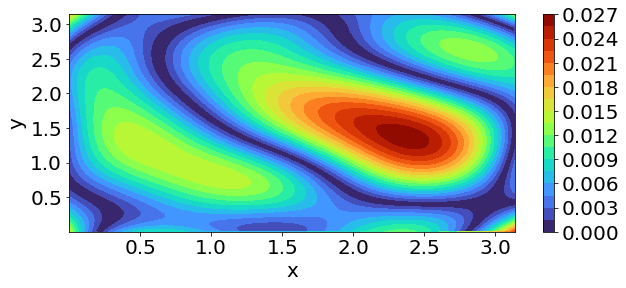

In [33]:
x_test = x_test.reshape(-1, )
y_test = y_test.reshape(-1, )
relative_error_b = relative_error_b.reshape(-1,)

CS = plt.tricontourf(x_test, y_test, relative_error_b, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp3/b_error_2d_3.png', dpi = 300, bbox_inches = "tight")

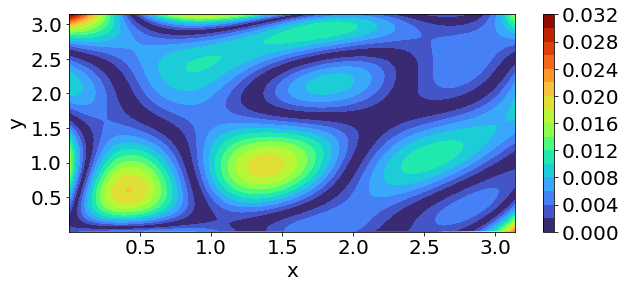

In [34]:
relative_error_d1 = relative_error_d1.reshape(-1,)

CS = plt.tricontourf(x_test, y_test, relative_error_d1, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp3/d1_error_2d_3.png', dpi = 300, bbox_inches = "tight")

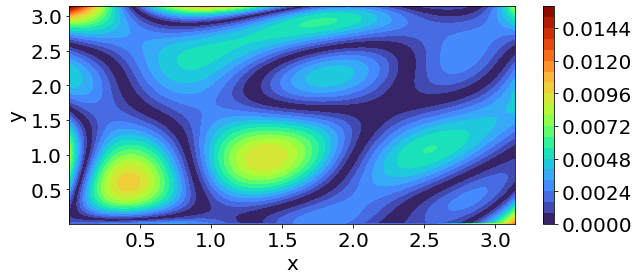

In [35]:
relative_error_d2 = relative_error_d2.reshape(-1,)

CS = plt.tricontourf(x_test, y_test, relative_error_d2, 20, cmap='turbo')


cbar = plt.colorbar(CS)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(20)


plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Results/twod/exp3/d2_error_2d_3.png', dpi = 300, bbox_inches = "tight")